# Machine Learning Model: XGBoost 

### Background 

The following notebook seeks to apply an XGBoost gradient boosting model based on random oversampled (ROS) and SMOTE data to determine a predictive model. The results will then be evaluated based on the following metrics; 

1. Accuracy score
2. Confusion matrix
3. ROC - AUC
4. Feature Improtance
5. Mean sqaured error (MSE) 

### Objective 

The purpose is to evaluate the machine learning model's predictive capabilities in regards to determining the likelihood account holders of a financial insitution would be to take out a personal loan. Additionally, the models performance will be measured against two other machine learning algorithms; Logistic Regression and Random Forest Classifier. 

---


## Initial Imports & Dependencies

In [5]:
# Importing Libraries & Dependencies
from pathlib import Path
import time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

In [6]:
# Import Machine Learning Model: GXBoost
from xgboost import XGBClassifier
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV

In [7]:
# Import SK-LEARN libraries 
from sklearn.metrics import balanced_accuracy_score, accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error
from sklearn.metrics import plot_roc_curve
from sklearn.metrics import roc_auc_score

In [8]:
# Import Warnings
import warnings
warnings.filterwarnings('ignore')

---

## Load Datasets

In [9]:
# Import SMOTE & Random Over Sampled dataset Features
# To import the X_train_smote, X_train_ros, X_train_scaled, X_test_scaled
X_train_smote = np.loadtxt('resources/X_train_smote.csv', delimiter=',')
X_train_ros = np.loadtxt('resources/X_train_ros.csv', delimiter=',')
X_train_scaled = np.loadtxt('resources/X_train_scaled.csv', delimiter=',')
X_test_scaled = np.loadtxt('resources/X_test_scaled.csv', delimiter=',')

# Import SMOTE & Random Over Sampled dataset Traget
# To import y_train_smote, y_train_ros
y_train_smote = pd.read_csv('resources/y_train_smote.csv', sep=',', header=0, squeeze=True)
y_train_ros = pd.read_csv('resources/y_train_ros.csv', sep=',', header=0, squeeze=True)

# Import raw target dataset
# To import y_train, y_test
y_train = pd.read_csv('resources/y_train.csv', sep=',', header=0, squeeze=True, index_col=0)
y_test = pd.read_csv('resources/y_test.csv', sep=',', header=0, squeeze=True, index_col=0)

In [10]:
# Test dataset import
# Display X_train_smote
X_train_smote

array([[-1.25090603, -1.16521339,  0.52423779, ..., -0.25383798,
         0.82104028, -0.64593619],
       [ 1.53218362, -0.66348527, -0.3456258 , ..., -0.25383798,
         0.82104028, -0.64593619],
       [-0.20724741, -0.11812861,  1.39410138, ..., -0.25383798,
         0.82104028,  1.54814054],
       ...,
       [-1.08483328,  1.49825072,  1.39410138, ..., -0.25383798,
        -1.21796704,  1.54814054],
       [ 1.44656411,  2.32987912, -0.44152605, ...,  3.93952076,
         0.82104028,  1.54814054],
       [-0.12027586,  1.73424248,  1.15969001, ..., -0.25383798,
        -1.21796704, -0.64593619]])

---

## XGBoost

The first part of the XGBoost notebook uses SMOTE training and testing data to develop a predictive model. 

### XGBoost: Model Optimization with RandmomizedSearchCV

Using the original SMOTE training dataset to build a more robust model the meta-estimator, Random Search CV algorithm will be used to determine the best fit hyper-paramter distributions.  

**Randomized Search CV Process:**

1. Set the hyper-parameters 
2. Create the RandomSearchCV variable
3. Time function optimization
4. Best Score
5. Best Parameters
6. Best Estimator 

*Best Estimator Note:*

Based on the 'best estimator' results, those paramaters will be used in the XGBoost Classifier model to evaluate the machine learning algorithms performance.

In [11]:
# Create an initial XGBoost Classifier model that will be used to optimize the hyper-parameters
clf = XGBClassifier()

In [12]:
# Create the models hyper-parameters using a dictionary
params = {
    "learning_rate" : [0.05,0.10,0.15,0.20,0.25,0.30], 
    "min_child_weight" : [1,3,4,7,9],
    "max_depth" : [2,3,4,6,7,9,11,12,15,16,18],
    "colsample_bytree" : [0.1,0.3,0.5,0.6,0.7],
    "booster" : ["gbtree", "gblinear", "dart"],
    "subsample": [0.5, 0.6, 0.7, 0.8, 0.9, 1.0],
    "gamma": [0, 0.25, 0.5, 1.0], 
    "reg_lambda": [0.1, 1.0, 5.0, 10.0, 50.0, 100.0],
    "n_estimators": [100]
}

In [13]:
# Random Search (rs) variable model
rs = RandomizedSearchCV(clf, param_distributions=params, n_iter=5,
                            n_jobs=1, verbose=2, cv=2,
                            scoring='roc_auc', random_state=42)

In [14]:
# Time optimization
# First, import the time function
# import time

# Create the start time function
print("Randomized search..")
search_time_start = time.time()

# Fit the SMOTE dataset
rs.fit(X_train_smote, y_train_smote)

# Time optimization print statement: 
print("Randomized search time:", time.time() - search_time_start)

Randomized search..
Fitting 2 folds for each of 5 candidates, totalling 10 fits
[CV] subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree, total=   1.7s
[CV] subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree 
[CV]  subsample=0.7, reg_lambda=50.0, n_estimators=100, min_child_weight=4, max_depth=11, learning_rate=0.1, gamma=0.5, colsample_bytree=0.5, booster=gbtree, total=   0.2s
[CV] subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart 


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    1.6s remaining:    0.0s


[CV]  subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart, total=   0.2s
[CV] subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart 
[CV]  subsample=0.6, reg_lambda=1.0, n_estimators=100, min_child_weight=7, max_depth=18, learning_rate=0.15, gamma=0, colsample_bytree=0.7, booster=dart, total=   0.2s
[CV] subsample=0.9, reg_lambda=50.0, n_estimators=100, min_child_weight=9, max_depth=11, learning_rate=0.05, gamma=1.0, colsample_bytree=0.5, booster=gbtree 
[CV]  subsample=0.9, reg_lambda=50.0, n_estimators=100, min_child_weight=9, max_depth=11, learning_rate=0.05, gamma=1.0, colsample_bytree=0.5, booster=gbtree, total=   0.1s
[CV] subsample=0.9, reg_lambda=50.0, n_estimators=100, min_child_weight=9, max_depth=11, learning_rate=0.05, gamma=1.0, colsample_bytree=0.5, booster=gbtree 
[CV]  subsample=0.9, r

[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    2.6s finished


Randomized search time: 3.132594108581543


In [15]:
# Calculate the Best Score
rs_best_score = rs.best_score_

# Display the best score
print(f"Random Search Best Score: {rs_best_score}")

Random Search Best Score: 0.9989392713255192


In [16]:
# Calculate the best hyper-parameters for the model
rs_best_params = rs.best_params_

# Display the best hyper-parameters
print(f"Random Search Hyper-Parameters: {rs_best_params}")

Random Search Hyper-Parameters: {'subsample': 0.6, 'reg_lambda': 1.0, 'n_estimators': 100, 'min_child_weight': 7, 'max_depth': 18, 'learning_rate': 0.15, 'gamma': 0, 'colsample_bytree': 0.7, 'booster': 'dart'}


In [17]:
# Display the best estimator to use in the model
rs.best_estimator_

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=18,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

---

### XGBoost Model: SMOTE Dataset

Now that the XGBoost Classifier model has pre-determined optimized hyper-paramters, the results can be applied to training and testing the SMOTE dataset.

**To evaluate the model the following metrics will be applied:**

1. Balanced Accuracy Score & Accuracy Score
2. Confusion Matrix
3. Classification Report 
4. Mean-Squared-Error & Root Mean-Squared-Error
5. ROC-AUC
6. Feature Importance 

#### Set the Model

In [18]:
# Set the model variable & the hyperparameters based on the 'best estimator' results
model = XGBClassifier(booster='dart', 
                      colsample_bytree=0.7, 
                      learning_rate=0.15,max_depth=18, 
                      min_child_weight=7, 
                      random_state=3, 
                      reg_lambda=1.0,
                      subsample=0.6)

In [19]:
# Fit the SMOTE dataset to the model 
model.fit(X_train_smote, y_train_smote)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=18,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=3,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Model Prediction

In [20]:
# Set a predict model
y_pred = model.predict(X_test_scaled)

# Display the variable
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [21]:
# Create a dataframe containing the y_pred results
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)

# Display the dataframe
results.tail()

,Prediction,Actual
1245,0,0
1246,1,1
1247,0,0
1248,0,0
1249,0,0


### SMOTE Model Evaluation: 

#### 1. Balanced Accuracy Score & Accuracy Score

In [22]:
# Evaluate the predict model through the Balanced Accuracy Score metric
model_balanced_accuracy_score = balanced_accuracy_score(y_test, y_pred)

# Evaluate the predict model through the Accuracy Score metric
model_accuracy_score = accuracy_score(y_test, y_pred)

# Print the evaluation results
print(f"SMOTE XGB Classifier Balanced Accuracy Score Model is: {model_balanced_accuracy_score}")
print(f"SMOTE XGB Classifier Accuracy Score Model is: {model_accuracy_score}")

SMOTE XGB Classifier Balanced Accuracy Score Model is: 0.9580752212389381
SMOTE XGB Classifier Accuracy Score Model is: 0.9848


#### 2. Confusion Matrix

Text(33.0, 0.5, 'Predicted')

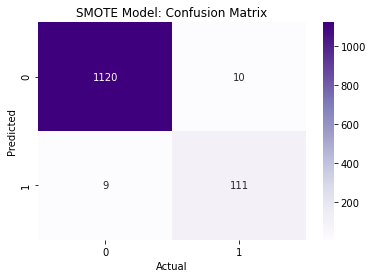

In [23]:
# Create the confusion matrix (cm)
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
sns.heatmap(cm,
            cmap = 'Purples', 
            fmt = '', 
            annot = True)

# Set plot labels 
plt.title("SMOTE Model: Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")


#### 3. Classification Report

In [24]:
# Classification report title print statement 
print("Classification Report:")

# Create the classification report
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      1130
           1       0.92      0.93      0.92       120

    accuracy                           0.98      1250
   macro avg       0.95      0.96      0.96      1250
weighted avg       0.98      0.98      0.98      1250



#### 4. Mean-Squared-Error & Root Mean-Squared-Error

In [25]:
# Calculate the models mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE: %f" % (mse))

MSE: 0.015200


In [26]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.123288


#### 5. ROC - AUC

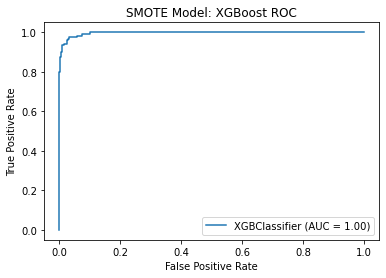

SMOTE Model: ROC-AUC Score: 0.9580752212389381


In [27]:
# Create the ROC curve 
roc_model_curve = plot_roc_curve(model, X_test_scaled, y_test)

# Set plot labels
plt.title("SMOTE Model: XGBoost ROC")

# Plot the ROC curve
plt.show()

# Print the ROC-AUC Score
print("SMOTE Model: ROC-AUC Score:", roc_auc_score(y_test, y_pred))

#### 6. Feature Importance

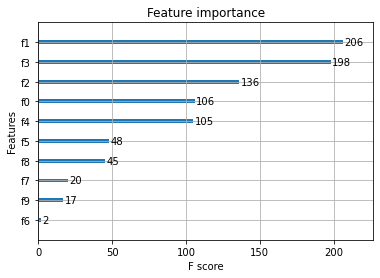

In [28]:
# Create the plot importance model
plot_importance(model)

# Display the plot
plt.show()

# how do I get the feature names to appear??

---

### XGBoost Model: Random Over Sampled (ROS) Dataset

Applying the optimized hyper-parameters determined in the second part of the notebook for the GXBoost Classifier model, the random over sampled (ROS) dataset will be evaluated through training and testing data. 

**To evaluate the model the following metrics will be applied:**

1. Balanced Accuracy Score & Accuracy Score
2. Confusion Matrix
3. Classification Report 
4. Mean-Squared-Error & Root Mean-Squared-Error
5. ROC-AUC
6. Feature Importance 

#### Set the Model

In [29]:
# Set the model variable & the hyperparameters based on the 'best estimator' results
model = XGBClassifier(booster='dart', 
                      colsample_bytree=0.7, 
                      learning_rate=0.15,max_depth=18, 
                      min_child_weight=7, 
                      random_state=3, 
                      reg_lambda=1.0,
                      subsample=0.6)

In [30]:
# Fit the ROS dataset to the model 
model.fit(X_train_ros, y_train_ros)

XGBClassifier(base_score=0.5, booster='dart', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=0.7, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.15, max_delta_step=0, max_depth=18,
              min_child_weight=7, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=3,
              reg_alpha=0, reg_lambda=1.0, scale_pos_weight=1, subsample=0.6,
              tree_method='exact', validate_parameters=1, verbosity=None)

#### Model Prediction

In [31]:
# Set a predict model
y_pred = model.predict(X_test_scaled)

# Display the variable
y_pred

array([0, 0, 0, ..., 0, 0, 0], dtype=int64)

In [32]:
# Create a dataframe containing the y_pred results
results = pd.DataFrame({"Prediction": y_pred, "Actual": y_test}).reset_index(drop=True)

# Display the dataframe
results.tail()

,Prediction,Actual
1245,0,0
1246,1,1
1247,0,0
1248,0,0
1249,0,0


### ROS Model Evaluation: 

#### 1. Balanced Accuracy Score & Accuracy Score

In [33]:
# Evaluate the predict model through the Balanced Accuracy Score metric
model_balanced_accuracy_score = balanced_accuracy_score(y_test, y_pred)

# Evaluate the predict model through the Accuracy Score metric
model_accuracy_score = accuracy_score(y_test, y_pred)

# Print the evaluation results
print(f"ROS XGB Classifier Balanced Accuracy Score Model is: {model_balanced_accuracy_score}")
print(f"ROS XGB Classifier Accuracy Score Model is: {model_accuracy_score}")

ROS XGB Classifier Balanced Accuracy Score Model is: 0.9665929203539823
ROS XGB Classifier Accuracy Score Model is: 0.98


#### 2. Confusion Matrix

Text(33.0, 0.5, 'Predicted')

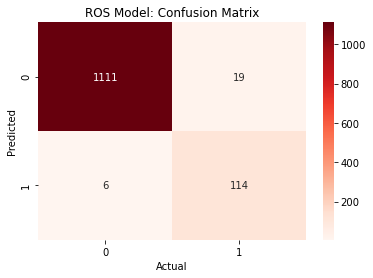

In [34]:
# Create the confusion matrix (cm)
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix
sns.heatmap(cm,
            cmap = 'Reds', 
            fmt = '', 
            annot = True)

# Set plot labels 
plt.title("ROS Model: Confusion Matrix")
plt.xlabel("Actual")
plt.ylabel("Predicted")

#### 3. Classification Report

In [35]:
# Classification report title print statement 
print("Classification Report:")

# Create the classification report
print(classification_report(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      1130
           1       0.86      0.95      0.90       120

    accuracy                           0.98      1250
   macro avg       0.93      0.97      0.95      1250
weighted avg       0.98      0.98      0.98      1250



#### 4. Mean-Squared-Error & Root Mean-Squared-Error

In [36]:
# Calculate the models mean squared error
mse = mean_squared_error(y_test, y_pred)
print("MSE: %f" % (mse))

MSE: 0.020000


In [37]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE: %f" % (rmse))

RMSE: 0.141421


#### 5. ROC - AUC

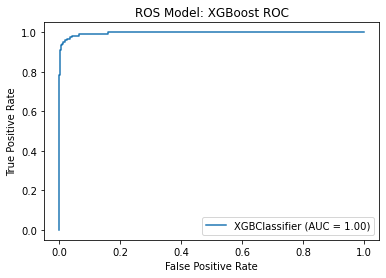

ROS Model: ROC-AUC Score: 0.9665929203539823


In [38]:
# Create the ROC curve 
roc_model_curve = plot_roc_curve(model, X_test_scaled, y_test)

# Set plot labels
plt.title("ROS Model: XGBoost ROC")

# Plot the ROC curve
plt.show()

# Print the ROC-AUC Score
print("ROS Model: ROC-AUC Score:", roc_auc_score(y_test, y_pred))

#### 6. Feature Importance

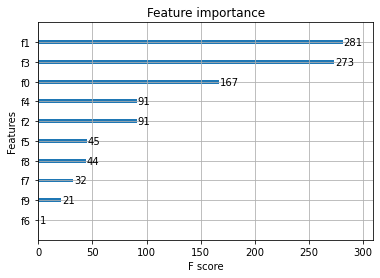

In [39]:
# Create the plot importance model
plot_importance(model)

# Display the plot
plt.show()

# how do I get the feature names to appear??

---

### XGBoost: Model Comparison & Conclusions

#### Accuracy Scores

In [40]:
# Create the model accuracy scores dataframe
accuracy_scores_model = pd.DataFrame({
    "Model Dataset" : ["XGBoost SMOTE Balanced Accuracy Score",
                       "XGBoost SMOTE Accuracy Score",
                       "XGBoost ROS Balanced Accuracy Score", 
                       "XGBoost ROS Accuracy Score"],
    "Score" : [0.9547,0.9856,0.9674,0.9816]
})

# Display the accuracy scores dataframe
accuracy_scores_model

,Model Dataset,Score
0,XGBoost SMOTE Balanced Accuracy Score,0.9547
1,XGBoost SMOTE Accuracy Score,0.9856
2,XGBoost ROS Balanced Accuracy Score,0.9674
3,XGBoost ROS Accuracy Score,0.9816


#### Confusion Matrix

In [41]:
# need to figure out how to display both of them side by side

#### Classification Report

In [38]:
# Ian's code here

#### Mean-Squared-Error & Root Mean-Squared-Error

In [39]:
# Create the model Mean-Squared-Error & Root Mean-Squared-Error dataframe
mse_rmse_scores = pd.DataFrame({
    "Model Dataset" : ["XGBoost SMOTE Mean-Squared-Error",
                       "XGBoost SMOTE Root Mean-Squared-Error",
                       "XGBoost ROS Mean-Squared-Error", 
                       "XGBoost ROS Root Mean-Squared-Error"],
    "Score" : [0.0144,0.1200,0.0184,0.1356]
})

# Display the Mean-Squared-Error & Root Mean-Squared-Error dataframe
mse_rmse_scores

,Model Dataset,Score
0,XGBoost SMOTE Mean-Squared-Error,0.0144
1,XGBoost SMOTE Root Mean-Squared-Error,0.1200
2,XGBoost ROS Mean-Squared-Error,0.0184
3,XGBoost ROS Root Mean-Squared-Error,0.1356


#### ROC - AUC

In [40]:
# Create the model ROC-AUC dataframe
roc_auc_scores = pd.DataFrame({ 
    "Model Dataset" : ["XGBoost SMOTE ROC-AUC", 
                       "XGBoost ROS ROC-AUC"],
    "Score" : [0.9547,0.9674]
})

# Display the ROC-AUC dataframe
roc_auc_scores

,Model Dataset,Score
0,XGBoost SMOTE ROC-AUC,0.9547
1,XGBoost ROS ROC-AUC,0.9674
